In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
bhavdip=pd.read_csv('TeamsHalf.csv')

In [5]:
print(bhavdip)

    year lgID tmID  half  rank   G   W   L  T  GF  GA
0   1916  NHA  MOC     1     1  10   7   3  0  58  38
1   1916  NHA  MOC     2     3  10   3   7  0  31  42
2   1916  NHA  MOW     1     5  10   3   7  0  56  72
3   1916  NHA  MOW     2     4  10   2   8  0  38  65
4   1916  NHA  OT1     1     2  10   7   3  0  56  41
5   1916  NHA  OT1     2     1  10   8   2  0  63  22
6   1916  NHA  QU1     1     6  10   2   8  0  43  80
7   1916  NHA  QU1     2     2  10   8   2  0  54  46
8   1916  NHA  TBS     1     4  10   5   5  0  50  45
9   1916  NHA  TBS     2     5   4   2   2  0  14  16
10  1916  NHA  TOB     1     3  10   6   4  0  70  57
11  1916  NHA  TOB     2     6   4   1   3  0   3  12
12  1917  NHL  MTL     1     1  14  10   4  0  81  47
13  1917  NHL  MTL     2     3   8   3   5  0  34  37
14  1917  NHL  MTW     1     4   6   1   5  0  17  35
15  1917  NHL  OTS     1     3  14   5   9  0  67  79
16  1917  NHL  OTS     2     2   8   4   4  0  35  35
17  1917  NHL  TOA     1    

In [6]:
bhavdip

,year,lgID,tmID,half,rank,G,W,L,T,GF,GA
0,1916,NHA,MOC,1,1,10,7,3,0,58,38
1,1916,NHA,MOC,2,3,10,3,7,0,31,42
2,1916,NHA,MOW,1,5,10,3,7,0,56,72
3,1916,NHA,MOW,2,4,10,2,8,0,38,65
4,1916,NHA,OT1,1,2,10,7,3,0,56,41
5,1916,NHA,OT1,2,1,10,8,2,0,63,22
6,1916,NHA,QU1,1,6,10,2,8,0,43,80
7,1916,NHA,QU1,2,2,10,8,2,0,54,46
8,1916,NHA,TBS,1,4,10,5,5,0,50,45
9,1916,NHA,TBS,2,5,4,2,2,0,14,16


In [7]:
bhavdip = bhavdip[['rank', 'GF']]
print(bhavdip)

    rank  GF
0      1  58
1      3  31
2      5  56
3      4  38
4      2  56
5      1  63
6      6  43
7      2  54
8      4  50
9      5  14
10     3  70
11     6   3
12     1  81
13     3  34
14     4  17
15     3  67
16     2  35
17     2  71
18     1  37
19     1  57
20     2  31
21     2  39
22     1  32
23     3  42
24     3  22
25     2  62
26     3  67
27     1  59
28     1  62
29     4  44
30     4  47
31     3  52
32     2  67
33     4  34
34     4  58
35     3  37
36     2  75
37     1  49
38     3  48
39     2  39
40     1  66


In [8]:
bhavdip.head()

,rank,GF
0,1,58
1,3,31
2,5,56
3,4,38
4,2,56


In [9]:
bhavdip.columns = ['year', 'GA']
print(bhavdip.columns)

Index(['year', 'GA'], dtype='object')


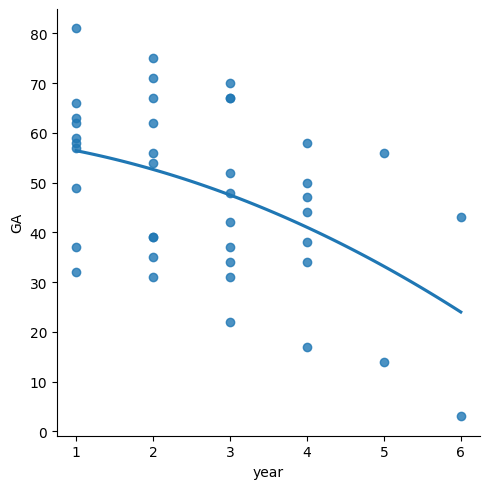

In [19]:
sns.lmplot(x ="year", y ="GA", data = bhavdip, order = 2, ci = None)
plt.show()

In [22]:
bhavdip.fillna(method ='ffill', inplace = True)

C:\Users\bhavd\AppData\Local\Temp\ipykernel_17128\310514939.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bhavdip.fillna(method ='ffill', inplace = True)
C:\Users\bhavd\AppData\Local\Temp\ipykernel_17128\310514939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhavdip.fillna(method ='ffill', inplace = True)


In [29]:
x = np.array(bhavdip['year']).reshape(-1, 1)

In [30]:
y = np.array(bhavdip['GA']).reshape(-1, 1)

In [31]:
regr = LinearRegression()

In [32]:
# Assuming 'x' and 'y' are already defined
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  

In [33]:
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.17872761836920326


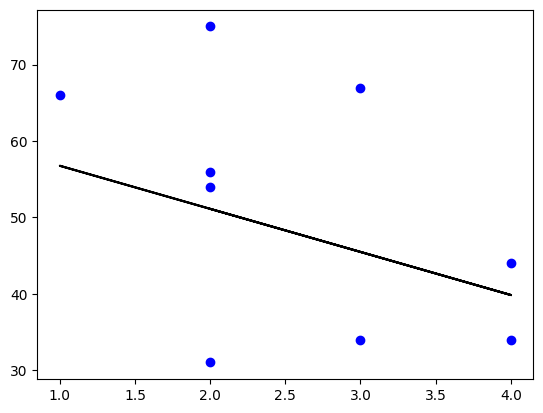

In [34]:
y_pred = regr.predict(x_test)
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')
 
plt.show()

In [35]:
stud = bhavdip[:][:500]
print(stud)

    year  GA
0      1  58
1      3  31
2      5  56
3      4  38
4      2  56
5      1  63
6      6  43
7      2  54
8      4  50
9      5  14
10     3  70
11     6   3
12     1  81
13     3  34
14     4  17
15     3  67
16     2  35
17     2  71
18     1  37
19     1  57
20     2  31
21     2  39
22     1  32
23     3  42
24     3  22
25     2  62
26     3  67
27     1  59
28     1  62
29     4  44
30     4  47
31     3  52
32     2  67
33     4  34
34     4  58
35     3  37
36     2  75
37     1  49
38     3  48
39     2  39
40     1  66


In [59]:
from sklearn.preprocessing import LabelEncoder
toBeEncode = ['year', 'lgID', 'tmID']
encoder = LabelEncoder()
for col in toBeEncode:
    df[col] = encoder.fit_transform(df[col])   

In [60]:
sliced_x = stud.iloc[:,0:3].join(stud.iloc[:,4:8])
sliced_x.head()

,year,GA
0,1,58
1,3,31
2,5,56
3,4,38
4,2,56
